# # Brute-force method : 억지 기법


# 1. 0/1 배낭 채우기 문제(0/1 knapsack problem) :
  - 목적: 가능한 모든 경우의 조합을 시도하여 최대 가치를 찾음 (브루트포스 접근법).
  - 모든 가능한 부분 집합을 탐색하여 배낭 용량을 초과하지 않으면서 최대 가치를 계산
  - 시간복잡도: O(2^n)

In [1]:
# subset은 n-비트의 이진수로 나타난 부분 집합을 의미. 출력된 각 리스트는 n개의 요소 중 어떤 것이 포함되었는지를 보여줌.
n = 3

for  i in range(2**n):
    subset = [0] * n
    for d in range(n):
        subset[d] = i%2
        i //=  2

    print(subset)




[0, 0, 0]
[1, 0, 0]
[0, 1, 0]
[1, 1, 0]
[0, 0, 1]
[1, 0, 1]
[0, 1, 1]
[1, 1, 1]


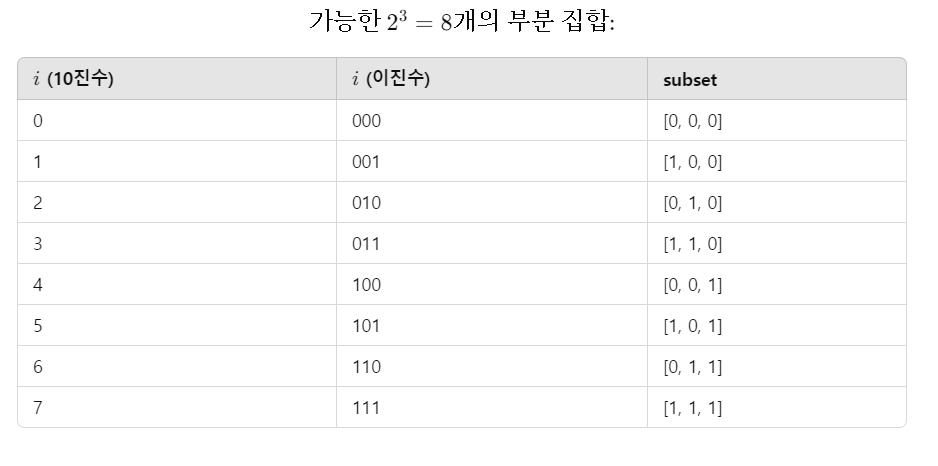

In [6]:
def knapsack01_bruteforce(weights, values, W):
    """
    1. 0/1 배낭 문제를 억지 기법으로 해결.
    2. 최대 가치와 해당 물건 반환
    :param weights : 물건별 무게 리스트
    :param values : 물건별 가치 리스트
    :param W : 배낭 용량
    :return 최대 가치, 선택된 물건 인덱스 리스트, 선택된 물건 무게 리스트, 선택된 물건 가치 리스트
    """

    n = len(weights)  # 전체 물건의 수
    best_value = 0  # 최대 가치 초기화
    best_subset = []  # 최대 가치일 때의 선택된 물건 저장

    for i in range(2**n):  # bruteforce 기법
        # 1. 부분집합 i -> 이진수 부분집합 표현
        subset = [0] * n
        temp = i
        for d in range(n):
            subset[d] = temp % 2
            temp //= 2

        # 2. 현재 부분 집합 i 즉, subset의 무게와 가치 계산
        sum_weight = 0
        sum_value = 0

        current_subset = []
        for d in range(n):
            if subset[d] == 1:  # 배낭에 물건을 포함시킬 때
                sum_weight += weights[d]
                sum_value += values[d]
                current_subset.append(d)

        # 3. 배낭 용량을 초과하지 않는 경우 최대 가치 갱신
        if sum_weight <= W and sum_value > best_value:
            best_value = sum_value
            best_subset = current_subset

    # 선택된 물건의 무게와 가치를 계산
    selected_weights = [weights[i] for i in best_subset]
    selected_values = [values[i] for i in best_subset]

    return best_value, best_subset, selected_weights, selected_values


# 테스트 데이터
weights = [10, 20, 30, 25, 35]  # 물건별 무게
values = [60, 100, 120, 70, 85]  # 물건별 가치
W = 80  # 배낭 용량

# 실행
result_value, result_items, result_weights, result_values = knapsack01_bruteforce(weights, values, W)
print("최대 가치:", result_value)
print("선택된 물건 인덱스:", result_items)
print("선택된 물건 무게:", result_weights)
print("선택된 물건 가치:", result_values)


최대 가치: 290
선택된 물건 인덱스: [1, 2, 3]
선택된 물건 무게: [20, 30, 25]
선택된 물건 가치: [100, 120, 70]


# #. Greedy method : 탐욕 기법

# 1. 분할 가능한 배낭 채우기 :

In [35]:
def knapsackFrac(weights, values, W): #무게, 가치, 용량 순서
    """
    분할 가능한 배낭 문제를 탐욕적 기법으로 해결
    탐욕 조건: 단위 무게당 가격이 가장 높은 물건부터 넣기

    :param weights: 물건별 무게 리스트
    :param values: 물건별 가치 리스트
    :param W: 배낭 용량
    :return: 최대 가치, 선택된 물건 정보 (인덱스, 실제 무게, 실제 가치, 비율)
    """
    n = len(weights)
    items = []
    
    # 1. 단위 무게당 가치를 계산하고 리스트에 추가
    for i in range(n):
        unit_value = values[i] / weights[i]
        items.append((unit_value, weights[i], values[i], i))  # 단위 가치, 무게, 가치, 인덱스

    # 2. 단위 무게당 가치를 기준으로 내림차순 정렬
    items.sort(reverse=True, key=lambda x: x[0])

    # 3. 탐욕적 선택으로 배낭 채우기
    max_value = 0  # 최대 가치
    selected_items = []  # 선택된 물건 정보

    for item in items:
        if W <= 0:
            break
        if W >= weight:  # 물건 전체를 넣을 수 있는 경우
            W -= weight
            max_value += value
            selected_items.append((index, weight, value, 1.0))  # 인덱스, 실제 무게, 실제 가치, 비율 1.0
        else:  # 일부만 넣어야 하는 경우
            fraction = W / weight
            max_value += value * fraction
            selected_items.append((index, W, value * fraction, fraction))  # 인덱스, 실제 무게, 실제 가치, 비율
            W = 0  # 배낭이 꽉 찼으므로 종료

    # 최대 가치 및 선택된 물건 정보 반환
    return max_value, selected_items


# 테스트 데이터
values = [12, 10, 8]  # 물건별 무게
weights = [120, 80, 60]  # 물건별 가치
capacity = 18  # 배낭 용량

# 실행
max_value, selected_items = knapsackFrac(weights, values, capacity)

# 결과 출력
print(f"최대 가치: {max_value}")
print("선택된 물건 정보:")
for index, weight, value, fraction in selected_items:
    print(f"  - 물건 인덱스: {index}, 무게: {weight}, 가치: {value}, 비율: {fraction}")

최대 가치: 144.0
선택된 물건 정보:
  - 물건 인덱스: 1, 무게: 6, 가치: 48.0, 비율: 1.0
  - 물건 인덱스: 1, 무게: 6, 가치: 48.0, 비율: 1.0
  - 물건 인덱스: 1, 무게: 6, 가치: 48.0, 비율: 1.0


# #. 분할 정복 기법(Divide and Conquer method)
- 병합 정렬(Merge Sort)
    - O(n log n)

# 1. 병합 정렬

In [38]:
# 각 병합 단계에서의 병합 후 배열 내용을 출력하도록 수정
# 분할 단계에서 배열의 상태를 출력하도록 코드를 수정
"""

    - 병합 정렬 함수, 배열 A를 left부터 right까지 정렬
    - DC 기법 사용
    :param A : 정렬한 배열
    :param left : 배열의 시작 인덱스
    :param right : 배열의 끝 인덱스

"""

def merge_sort(A, left, right):
    if left < right:
        # 1. 중간 인덱스 계산
        mid = (left + right) // 2

        # 분할 단계 결과 출력
        print(f"분할 단계: left = {left}, mid = {mid}, right = {right}, 배열 상태 = {A[left:right + 1]}")

        # 2. 왼쪽 부분 배열 정렬
        merge_sort(A, left, mid)

        # 3. 오른쪽 부분 배열 정렬
        merge_sort(A, mid + 1, right)

        # 4. 정렬된 두 부분 병합
        merge(A, left, mid, right)


def merge(A, left, mid, right):

    #1. 병합을 위한 임시 리스트 생성
    sorted_temp = [0] * (right - left + 1)
    i, j, k = left, mid + 1, 0 #왼쪽, 오른쪽 병합을 위한 임시 리스트 인덱스

    #2. 두 부분 배열 비교하며 병합
    while i <= mid and j <= right:
        if A[i] <= A[j]:
            sorted_temp[k] = A[i]
            i, k = i+1, k+1
        else:
            sorted_temp[k] = A[j]
            j, k = j+1, k+1

    #3. 남은 오른쪽 부분 배열 복사
    while j <= right:
        sorted_temp[k] = A[j]
        j, k = j+1, k + 1

    #4. 남은 왼쪽 부분 배열 검사
    while i <= mid:
        sorted_temp[k] = A[i]
        i, k = i+1, k+1

    #5. 임시 배열의 결과를 원래 배열에 복사
    for k in range(len(sorted_temp)):
        A[left + k] = sorted_temp[k]

    #6. 병합 단계 결과 출력
    print(f"병합 단계 : left ={left}, mid = {mid}, right = {right}, 배열 상태 = {A[left:right + 1]}")

# 테스트 코드
if __name__ == "__main__":
    # 테스트 데이터
    arr = [1, 3, 7, 8, 2, 5, 9, 6]
    print("정렬 전 배열:", arr)

    # 병합 정렬 실행
    merge_sort(arr, 0, len(arr) - 1)

    print("정렬 후 배열:", arr)


정렬 전 배열: [1, 3, 7, 8, 2, 5, 9, 6]
분할 단계: left = 0, mid = 3, right = 7, 배열 상태 = [1, 3, 7, 8, 2, 5, 9, 6]
분할 단계: left = 0, mid = 1, right = 3, 배열 상태 = [1, 3, 7, 8]
분할 단계: left = 0, mid = 0, right = 1, 배열 상태 = [1, 3]
병합 단계 : left =0, mid = 0, right = 1, 배열 상태 = [1, 3]
분할 단계: left = 2, mid = 2, right = 3, 배열 상태 = [7, 8]
병합 단계 : left =2, mid = 2, right = 3, 배열 상태 = [7, 8]
병합 단계 : left =0, mid = 1, right = 3, 배열 상태 = [1, 3, 7, 8]
분할 단계: left = 4, mid = 5, right = 7, 배열 상태 = [2, 5, 9, 6]
분할 단계: left = 4, mid = 4, right = 5, 배열 상태 = [2, 5]
병합 단계 : left =4, mid = 4, right = 5, 배열 상태 = [2, 5]
분할 단계: left = 6, mid = 6, right = 7, 배열 상태 = [9, 6]
병합 단계 : left =6, mid = 6, right = 7, 배열 상태 = [6, 9]
병합 단계 : left =4, mid = 5, right = 7, 배열 상태 = [2, 5, 6, 9]
병합 단계 : left =0, mid = 3, right = 7, 배열 상태 = [1, 2, 3, 5, 6, 7, 8, 9]
정렬 후 배열: [1, 2, 3, 5, 6, 7, 8, 9]


# #. 동적 계획법 (Dynamic Programming)

# 1. fibonacci 수열

In [1]:
#  메모이제이션 과정에서 각 계산 단계와 저장된 값을 출력하도록 수정한 코드
def fib_top_down_dp_memo(n, memo={}):
    """
    - 피보나치 수열을 메모이제이션을 사용한 Top-Down 방식으로 계산
    - 부분 문제의 개수 : n이므로 성능은 시간복잡도와 공간 복잡도는 각각 O(n)
    :param n : 계산할 피보나치 수의 위치
    :param memo : 이미 계산된 피보나치 값을 저장하는 딕셔너리
    :return : n번째 피보나치 수
    """
    if n not in memo: # 메모에 없는 경ㅇ우 계산
        print(f"계산 중 : fib{n}")
        if n <= 1: #기본조건 n=0 or n=1
            memo[n] = n
        else:
            memo[n] = fib_top_down_dp_memo(n-1, memo) + fib_top_down_dp_memo(n-2, memo)
            
        print(f"메모이제이션 : fib({n}) = {memo[n]}") # 저장된 값 출력

    else:
        print(f"메모 참조 : fib({n}) = {memo[n]}") # 이미 저장된 값 참조

    return memo[n]


    



# 테스트 코드
if __name__ == "__main__":
    # 테스트 데이터
    n = 4
    print(f"피보나치 수열의 {n}번째 항:", fib_top_down_dp_memo(n))

계산 중 : fib4
계산 중 : fib3
계산 중 : fib2
계산 중 : fib1
메모이제이션 : fib(1) = 1
계산 중 : fib0
메모이제이션 : fib(0) = 0
메모이제이션 : fib(2) = 1
메모 참조 : fib(1) = 1
메모이제이션 : fib(3) = 2
메모 참조 : fib(2) = 1
메모이제이션 : fib(4) = 3
피보나치 수열의 4번째 항: 3


In [5]:
# 테이블화과정에서 각 계산 단계와 저장된 값을 출력하도록 수정한 코드
# 반복문과 테이블을 결합하여 최적 부분 구조를 반복적으로 계산하지 않도록 효율적으로 문제를 해
# 테스트 코드
def fib_bottomUP_dp_table(n):
    """
    - 피보나치 수열을 테이블화를 이용한 바텀업 방식으로 계산
    :param n : 계싼할 피보나치 수의 위치
    :return : n번째 피보나치의 수
    """
    # 1. 1차원 구조의 테이블 생성 및 초기화
    f = [None] * (n + 1)
    #base case
    f[0] = 0
    f[1] = 1

    print(f"초기 테이블 : {f}")

    # 2. 테이블 채우기 (bottom-up) : general case
    for i in range(2, n+1):
        f[i] = f[i-1] + f[i-2]
        print(f"테이블 상태 (i={i}): {f}")

    return f[n]

if __name__ == "__main__":
    # 테스트 데이터
    test_cases = [10]

    for n in test_cases:
        print(f"Fibonacci({n}) = {fib_bottomUP_dp_table(n)}")

초기 테이블 : [0, 1, None, None, None, None, None, None, None, None, None]
테이블 상태 (i=2): [0, 1, 1, None, None, None, None, None, None, None, None]
테이블 상태 (i=3): [0, 1, 1, 2, None, None, None, None, None, None, None]
테이블 상태 (i=4): [0, 1, 1, 2, 3, None, None, None, None, None, None]
테이블 상태 (i=5): [0, 1, 1, 2, 3, 5, None, None, None, None, None]
테이블 상태 (i=6): [0, 1, 1, 2, 3, 5, 8, None, None, None, None]
테이블 상태 (i=7): [0, 1, 1, 2, 3, 5, 8, 13, None, None, None]
테이블 상태 (i=8): [0, 1, 1, 2, 3, 5, 8, 13, 21, None, None]
테이블 상태 (i=9): [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, None]
테이블 상태 (i=10): [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
Fibonacci(10) = 55


# 2. 배낭 채우기 (0/1 Kanpsack problem)

In [12]:
def knapSack_dp(W, wt, val, n):
    """
    - 0/1 배낭 문제를 동적 계획법으로 해결, 테이블화 과정을 출력
    - 시간복잡도 : O(nW), 공간복잡도 O(nW)
    :param W : 배낭의 용량
    :param wt : 물건별 무게 리스트
    :param val : 물건별 가치 리스트
    :param n : 물건의 갯수
    :return : 배낭에 담을 수 있는 최대 가치 (A[n][W] & 선택된 물건 정보)
    """
    # 1. 2차원 DP 테이블 생성 (크기 : (n+1) * (W+1))
    A = []
    for i in range(n + 1):  # "물건의 개수 + 1"
        row = [0] * (W + 1)  # 배낭 용량 + 1 크기의 리스트 초기화
        A.append(row)  # 각 행을 DP 테이블에 추가

    # 2. A[n][W]에 대한 테이블 채우기
    for i in range(1, n + 1):  # i는 물건 번호
        for w in range(1, W + 1):  # W는 현재 남아 있는 배낭 용량
            if wt[i - 1] > w:  # i번째 물건이 현재 배낭 용량 W를 초과하면
                A[i][w] = A[i - 1][w]  # 이전 물건의 값 가져오기
            else:
                valWith = val[i - 1] + A[i - 1][w - wt[i - 1]]
                valWithout = A[i - 1][w]
                A[i][w] = max(valWith, valWithout)  # 둘 중 최대값 선택

        # 각 물건 처리 후 DP 테이블 상태 출력
        print(f"물건 {i}, (무게 = {wt[i - 1]}, 가치 = {val[i - 1]}) 처리 후 :")
        for row in A:
            print(row)

    # 3. 역추적 : 선택된 물건 찾기
    selected_items = []
    w = W
    for i in range(n, 0, -1):  # DP 테이블 역추적
        if A[i][w] != A[i - 1][w]:  # 물건 i가 배낭에 포함된 경우
            selected_items.append(i)
            w -= wt[i - 1]
    selected_items.reverse()  # 선택된 물건 번호를 원래 순서대로 되돌림

    return A[n][W], selected_items


# 테스트 코드
if __name__ == "__main__":
    # 테스트 데이터
    wt = [2, 3, 4]  # 물건별 무게 리스트
    val = [3, 4, 5]  # 물건별 가치 리스트
    W = 5  # 배낭 용량
    n = len(wt)  # 물건의 개수

    # 실행
    result, selected_items = knapSack_dp(W, wt, val, n)
    print(f"\n배낭 용량 {W}에서의 최대 가치: {result}")
    print(f"선택된 물건 번호: {selected_items}")
    print("선택된 물건 정보:")
    for i in selected_items:
        print(f"  물건 {i}: 무게={wt[i - 1]}, 가치={val[i - 1]}")


물건 1, (무게 = 2, 가치 = 3) 처리 후 :
[0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
물건 2, (무게 = 3, 가치 = 4) 처리 후 :
[0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 3, 3]
[0, 0, 3, 4, 4, 7]
[0, 0, 0, 0, 0, 0]
물건 3, (무게 = 4, 가치 = 5) 처리 후 :
[0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 3, 3]
[0, 0, 3, 4, 4, 7]
[0, 0, 3, 4, 5, 7]

배낭 용량 5에서의 최대 가치: 7
선택된 물건 번호: [1, 2]
선택된 물건 정보:
  물건 1: 무게=2, 가치=3
  물건 2: 무게=3, 가치=4


# #. 공간으로 시간 벌기 : 해싱